In [ ]:
import pandas as pd

url = '/content/drive/MyDrive/For Python/Hate Speech.csv'
data = pd.read_csv(url)

In [ ]:
import random

random.seed(123)

data = data.reset_index(drop=True)
data

,Unnamed: 0,id,text,label,type,model_wrong,db.model_preds,status,round,split,annotator
0,1,10000,It should be legal for a husband to rape his wife,hate,notgiven,True,0.97457,dynabench entry,1,train,gnzuctwed3
1,2,10001,dalits are lowlife scum,hate,notgiven,False,0.08233,dynabench entry,1,test,cagnluiznm
2,3,10002,dalits are lowlives,hate,notgiven,True,0.92319,dynabench entry,1,train,cagnluiznm
3,4,10003,It was a better world when women dare not ques...,hate,notgiven,True,0.99006,dynabench entry,1,test,gnzuctwed3
4,5,10004,I don't work this hard so that those immigrant...,hate,notgiven,True,0.98836,dynabench entry,1,train,cagnluiznm
...,...,...,...,...,...,...,...,...,...,...,...
40618,40736,9995,we should forcibly remove all the foreigners f...,hate,notgiven,True,0.86945,dynabench entry,1,train,cagnluiznm
40619,40737,9996,we should forcibly remove all the immigrants f...,hate,notgiven,True,0.50039,dynabench entry,1,train,cagnluiznm
40620,40738,9997,dalits are unworthy of the Gods love,hate,notgiven,True,0.97652,dynabench entry,1,train,cagnluiznm
40621,40739,9998,dalits are worthless,hate,notgiven,True,0.94326,dynabench entry,1,train,cagnluiznm


**Use only text and labels.**

In [ ]:
df = data[['id', 'text', 'label']]
df

,id,text,label
0,10000,It should be legal for a husband to rape his wife,hate
1,10001,dalits are lowlife scum,hate
2,10002,dalits are lowlives,hate
3,10003,It was a better world when women dare not ques...,hate
4,10004,I don't work this hard so that those immigrant...,hate
...,...,...,...
40618,9995,we should forcibly remove all the foreigners f...,hate
40619,9996,we should forcibly remove all the immigrants f...,hate
40620,9997,dalits are unworthy of the Gods love,hate
40621,9998,dalits are worthless,hate


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40623 entries, 0 to 40622
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      40623 non-null  object
 1   text    40623 non-null  object
 2   label   40623 non-null  object
dtypes: object(3)
memory usage: 952.2+ KB


**Examine the labels.**

label
hate       0.544618
nothate    0.455382
Name: proportion, dtype: float64


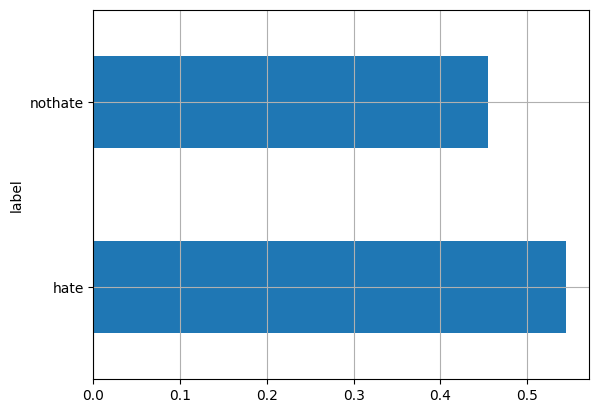

In [ ]:
import matplotlib.pyplot as plt
print(df['label'].value_counts(normalize = True))
df['label'].value_counts(normalize = True).plot(kind = 'barh')
plt.grid(True)
plt.show()

**Not much of a class imbalance problem.**

**Examine the text.**

In [ ]:
df['text'].str.len().max()

2366

In [ ]:
df[df['text'].str.len() >= 2000]

,id,text,label
30926,33958,Deeyah Khan firstly is not British. Not only w...,hate
30927,33958p,Deeyah Khan firstly is not British. Not only w...,nothate
31863,34689,"Oh God. When you see the city, London on the t...",hate
31864,34689p,"Oh God. When you see the city, London on the t...",nothate
32729,39558,Adam & Even were the first 'white' people on t...,hate
32730,39558p,Adam & Even were the first people on this ear...,nothate


**It appears that there are duplicate data entries.**

In [ ]:
df.loc[30994, 'text']

"The smaller peninsula, arguably has bigger and more deer than the upper, because of the farms(Well fed white tails seem to thrive and get bigger, if they can avoid the trigger happy orange army come firearm opener). This was down in South-Central Michiga, so fortunately it was quite far away from the Arabs. As far as hunting around this area goes, it depends. The area I am hunting is way over-crowded, so it makes it a pain sometimes. I'm actually looking at buying property because of this. A few miles further west where a friend of a friend has some private land they lease, they would have let this deer walk all day, because they have way bigger deer on their land."

In [ ]:
df.loc[30995, 'text']

"I hit one with a van going 87mph with my full beam lights on and the horn blowin' Oooh what an elusive creature. I'm joking. Nice kill. I don't hunt really anymore but have had a shot a couple times. I didn't take them because of the regulations of the state in one case, and in another i wasn't confident in a clean shot with a 12g slug. I respect your patience and honor for the game. I was referencing Ron White in my first sentence. Congrats man!"

**Examine the small length.**

In [ ]:
df['text'].str.len().min()

1

In [ ]:
df[df['text'].str.len() <= 10]

,id,text,label
190,10271,Them vs US,hate
192,10273,We vs them,hate
275,10524,im dead,nothate
429,11167,fuck boris,nothate
537,11278,i hate uni,nothate
608,11354,i hate you,nothate
770,11520,I am shit,nothate
1153,11916,Fuck,nothate
1412,12204,I hate bgt,nothate
1547,12349,he died,nothate


**Some of them are rude words but are not considered hate speech. According to the Cambridge dictionary, hate speech is defined as 'public speech that expresses hate or encourages violence towards a person or group based on factors such as race, religion, sex, or sexual orientation.**

**It's important to note that the classification of speech as hate speech can be subjective and context-dependent. Different individuals or communities may interpret language differently.**

**So, i decided to use with label giving us.**

In [ ]:
df.loc[:, 'encoded_label'] = df['label'].map({'hate': 1, 'nothate': 0})

<ipython-input-13-80d25d98025a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, 'encoded_label'] = df['label'].map({'hate': 1, 'nothate': 0})


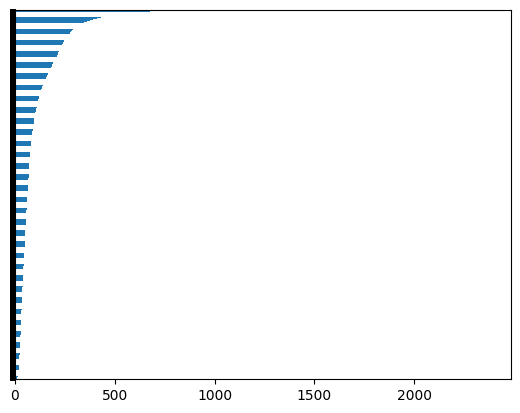

In [ ]:
ax = df['text'].apply(len).sort_values().plot(kind='barh')
ax.set_yticklabels([])
plt.show()

**Average length.**

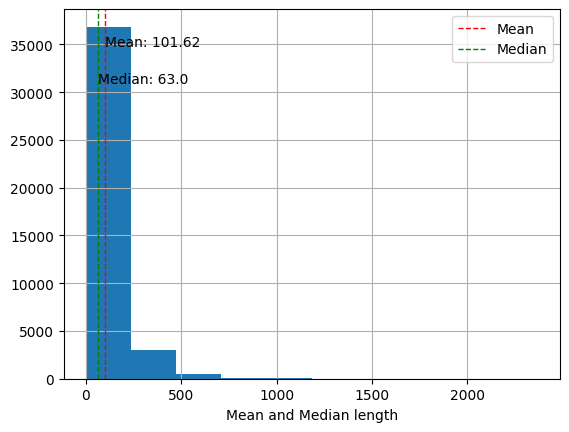

In [ ]:
import matplotlib.pyplot as plt

text_length = df['text'].apply(len)
text_length.hist()

mean_length = text_length.mean()
median_length = text_length.median()

plt.axvline(mean_length, color='r', linestyle='dashed', linewidth=1, label='Mean')
plt.axvline(median_length, color='g', linestyle='dashed', linewidth=1, label='Median')

plt.text(mean_length, plt.ylim()[1]*0.9, f'Mean: {mean_length:.2f}', color='black', fontsize=10, ha='left')
plt.text(median_length, plt.ylim()[1]*0.8, f'Median: {median_length}', color='black', fontsize=10, ha='left')

plt.xlabel('Mean and Median length')
plt.legend()

plt.show()

**I will use Doc2Vec to create features, utilizing 500 dimensions as it covers most of the data length (98%).**

In [ ]:
(text_length <= 500).sum()/ len(text_length)

0.9849838761292864

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from nltk.tokenize import word_tokenize


documents = df['text']

tokenized_docs = [word_tokenize(doc.lower()) for doc in documents]


tagged_data = [TaggedDocument(words=doc, tags=[str(i)]) for i, doc in enumerate(tokenized_docs)]


model = Doc2Vec(vector_size=500, min_count=2, epochs=200)
model.build_vocab(tagged_data)
model.train(tagged_data, total_examples=model.corpus_count, epochs=model.epochs)

In [ ]:
df['token'] = tokenized_docs

<ipython-input-46-93daa00382bd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['token'] = tokenized_docs


In [ ]:
df['features'] = df['token'].apply(model.infer_vector)

<ipython-input-47-df9c1f5ed54f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['features'] = df['token'].apply(model.infer_vector)


In [ ]:
df_train = df[['encoded_label','features']]
df_train

,encoded_label,features
0,1,"[-0.10637859, -0.45526564, -0.6245449, 0.20169..."
1,1,"[0.10976763, 0.030536633, -0.33248878, 0.08535..."
2,1,"[0.035227016, 0.035514206, -0.19634657, 0.0529..."
3,1,"[0.4167581, -0.044669773, -0.92113346, 0.59572..."
4,1,"[-0.3240503, 0.3265683, 0.009789995, -0.022012..."
...,...,...
40618,1,"[0.43766487, -0.21384707, -0.37364995, 0.04608..."
40619,1,"[0.4378008, -0.24375428, -0.19980846, -0.01030..."
40620,1,"[0.029692914, -0.044908043, -0.4055105, 0.2123..."
40621,1,"[0.07774095, -0.06444647, -0.2320937, 0.042609..."


In [ ]:
df_features = pd.DataFrame(df_train['features'].tolist(), columns=['f_' + str(i) for i in range(len(df['features'][0]))])
df_features

,f_0,f_1,f_2,f_3,f_4,f_5,f_6,f_7,f_8,f_9,...,f_490,f_491,f_492,f_493,f_494,f_495,f_496,f_497,f_498,f_499
0,-0.106379,-0.455266,-0.624545,0.201693,0.239003,-0.058841,-0.513229,0.190380,0.030816,-0.023123,...,-0.000677,0.355288,0.150517,0.225050,-0.426204,0.564911,-0.080746,0.051681,-0.133294,0.063054
1,0.109768,0.030537,-0.332489,0.085351,0.192880,0.098242,-0.094327,0.122069,-0.063976,0.221621,...,-0.012829,0.295479,-0.101122,0.107709,-0.088334,-0.100324,-0.056847,0.002591,0.026713,0.165627
2,0.035227,0.035514,-0.196347,0.052910,0.100707,-0.030492,-0.085881,-0.024257,-0.031179,0.228500,...,0.073429,0.204980,-0.063014,0.149517,-0.051244,0.111288,-0.076141,0.017424,-0.005696,0.151785
3,0.416758,-0.044670,-0.921133,0.595726,-0.170837,0.137347,-0.338525,-0.385714,-0.587141,0.526204,...,0.867269,-0.226806,-0.228104,0.451979,0.114727,-0.882622,-0.184048,-0.143495,-0.312320,-0.017352
4,-0.324050,0.326568,0.009790,-0.022012,0.582148,0.142950,-0.110133,-0.072802,-0.151718,-0.248098,...,-0.030307,0.097505,-0.278855,0.221603,-0.633744,-0.723994,0.267834,-0.310442,-0.186330,-0.610249
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40618,0.437665,-0.213847,-0.373650,0.046084,-0.223469,0.086109,-0.038370,0.368580,0.019379,0.088693,...,0.182556,0.052092,-0.306292,0.198350,-0.363612,-0.020246,-0.087302,-0.193455,0.154710,0.083778
40619,0.437801,-0.243754,-0.199808,-0.010303,-0.107050,0.256430,-0.122938,0.236330,-0.001631,0.052093,...,0.160146,-0.084348,-0.329660,0.227654,-0.485840,0.061614,0.110329,-0.231190,-0.078593,0.021086
40620,0.029693,-0.044908,-0.405510,0.212302,0.099051,0.001496,0.081559,0.191470,0.021978,0.146906,...,-0.040628,0.017807,0.082935,-0.029931,-0.032385,0.108538,0.055007,0.053811,-0.127723,-0.108484
40621,0.077741,-0.064446,-0.232094,0.042609,-0.056419,0.002354,-0.032405,0.007854,0.084031,0.244582,...,0.122593,0.315828,-0.109520,0.026674,-0.094156,-0.024992,-0.050946,-0.171518,0.014982,0.249613


In [ ]:
df_train = pd.concat([df_train, df_features], axis = 1)

In [ ]:
df_train = df_train.drop('features', axis = 1)
df_train

,encoded_label,f_0,f_1,f_2,f_3,f_4,f_5,f_6,f_7,f_8,...,f_490,f_491,f_492,f_493,f_494,f_495,f_496,f_497,f_498,f_499
0,1,-0.106379,-0.455266,-0.624545,0.201693,0.239003,-0.058841,-0.513229,0.190380,0.030816,...,-0.000677,0.355288,0.150517,0.225050,-0.426204,0.564911,-0.080746,0.051681,-0.133294,0.063054
1,1,0.109768,0.030537,-0.332489,0.085351,0.192880,0.098242,-0.094327,0.122069,-0.063976,...,-0.012829,0.295479,-0.101122,0.107709,-0.088334,-0.100324,-0.056847,0.002591,0.026713,0.165627
2,1,0.035227,0.035514,-0.196347,0.052910,0.100707,-0.030492,-0.085881,-0.024257,-0.031179,...,0.073429,0.204980,-0.063014,0.149517,-0.051244,0.111288,-0.076141,0.017424,-0.005696,0.151785
3,1,0.416758,-0.044670,-0.921133,0.595726,-0.170837,0.137347,-0.338525,-0.385714,-0.587141,...,0.867269,-0.226806,-0.228104,0.451979,0.114727,-0.882622,-0.184048,-0.143495,-0.312320,-0.017352
4,1,-0.324050,0.326568,0.009790,-0.022012,0.582148,0.142950,-0.110133,-0.072802,-0.151718,...,-0.030307,0.097505,-0.278855,0.221603,-0.633744,-0.723994,0.267834,-0.310442,-0.186330,-0.610249
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40618,1,0.437665,-0.213847,-0.373650,0.046084,-0.223469,0.086109,-0.038370,0.368580,0.019379,...,0.182556,0.052092,-0.306292,0.198350,-0.363612,-0.020246,-0.087302,-0.193455,0.154710,0.083778
40619,1,0.437801,-0.243754,-0.199808,-0.010303,-0.107050,0.256430,-0.122938,0.236330,-0.001631,...,0.160146,-0.084348,-0.329660,0.227654,-0.485840,0.061614,0.110329,-0.231190,-0.078593,0.021086
40620,1,0.029693,-0.044908,-0.405510,0.212302,0.099051,0.001496,0.081559,0.191470,0.021978,...,-0.040628,0.017807,0.082935,-0.029931,-0.032385,0.108538,0.055007,0.053811,-0.127723,-0.108484
40621,1,0.077741,-0.064446,-0.232094,0.042609,-0.056419,0.002354,-0.032405,0.007854,0.084031,...,0.122593,0.315828,-0.109520,0.026674,-0.094156,-0.024992,-0.050946,-0.171518,0.014982,0.249613


**Train the XGBoost model and perform hyperparameter tuning.**

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from xgboost import XGBClassifier


X_train, X_test, y_train, y_test = train_test_split(df_train.drop('encoded_label', axis = 1), df_train['encoded_label'], test_size=0.2, random_state=42)

xgb_model = XGBClassifier()

param_grid = {
    'n_estimators': [300],
    'max_depth': [7, 10, 15],
    'min_child_weight': [5, 7]}

grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, scoring='accuracy', cv=3, verbose = 4)
grid_search.fit(X_train, y_train)

print("Best Hyperparameters:", grid_search.best_params_)

best_model = grid_search.best_estimator_
accuracy = best_model.score(X_test, y_test)
print("Test Accuracy:", accuracy)

Fitting 3 folds for each of 6 candidates, totalling 18 fits
[CV 1/3] END max_depth=7, min_child_weight=5, n_estimators=300;, score=0.686 total time= 1.4min
[CV 2/3] END max_depth=7, min_child_weight=5, n_estimators=300;, score=0.697 total time= 1.4min
[CV 3/3] END max_depth=7, min_child_weight=5, n_estimators=300;, score=0.695 total time= 1.5min
[CV 1/3] END max_depth=7, min_child_weight=7, n_estimators=300;, score=0.690 total time= 1.4min
[CV 2/3] END max_depth=7, min_child_weight=7, n_estimators=300;, score=0.692 total time= 1.4min
[CV 3/3] END max_depth=7, min_child_weight=7, n_estimators=300;, score=0.695 total time= 1.4min
[CV 1/3] END max_depth=10, min_child_weight=5, n_estimators=300;, score=0.691 total time= 1.8min
[CV 2/3] END max_depth=10, min_child_weight=5, n_estimators=300;, score=0.696 total time= 2.0min
[CV 3/3] END max_depth=10, min_child_weight=5, n_estimators=300;, score=0.686 total time= 1.8min
[CV 1/3] END max_depth=10, min_child_weight=7, n_estimators=300;, score=0

**With class labels distributed at 54:46 ratio, the model achieved an accuracy of almost 70%.**

**Compare to a good model 'Hate-speech-CNERG/dehatebert-mono-english' from hugging face.**

**Title: Deep Learning Models for Multilingual Hate Speech Detection**

**Author: Aluru, Sai Saket and Mathew, Binny and Saha, Punyajoy and Mukherjee, Animesh**

**Journal: arXiv preprint arXiv:2004.06465**

**Year: 2020**

In [ ]:
from transformers import AutoModelForSequenceClassification, AutoTokenizer

model_name = "Hate-speech-CNERG/dehatebert-mono-english"

tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/152 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.23k [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/872k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/669M [00:00<?, ?B/s]

In [ ]:
import torch

def dehatebert_model(text):

  inputs = tokenizer(text, return_tensors="pt")

  outputs = model(**inputs)

  predicted_label = torch.argmax(outputs.logits, dim=1).item()

  return predicted_label

In [ ]:
df_for_dehatebert_model = df[['text', 'encoded_label']]
df_for_dehatebert_model

,text,encoded_label
0,It should be legal for a husband to rape his wife,1
1,dalits are lowlife scum,1
2,dalits are lowlives,1
3,It was a better world when women dare not ques...,1
4,I don't work this hard so that those immigrant...,1
...,...,...
40618,we should forcibly remove all the foreigners f...,1
40619,we should forcibly remove all the immigrants f...,1
40620,dalits are unworthy of the Gods love,1
40621,dalits are worthless,1


**The model can only handle sequences up to a length of 512.**

In [ ]:
(df_for_dehatebert_model['text'].apply(len) >512).sum() / len(df_for_dehatebert_model['text'])

0.01395761022081087

**Only 1.4% exceed 512, therefore truncation can be appropriately applied.**

In [ ]:
df_for_dehatebert_model['text_truncated'] = df_for_dehatebert_model['text'].apply(lambda x: x[:512])

<ipython-input-20-dbd89123e9b2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_for_dehatebert_model['text_truncated'] = df_for_dehatebert_model['text'].apply(lambda x: x[:512])


In [ ]:
(df_for_dehatebert_model['text_truncated'].apply(len) >512).sum()

0

In [ ]:
df_for_dehatebert_model['pred'] = df_for_dehatebert_model['text_truncated'].apply(dehatebert_model)

<ipython-input-100-43b81b3a11ca>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_for_dehatebert_model['pred'] = df_for_dehatebert_model['text_truncated'].apply(dehatebert_model)


In [ ]:
(df_for_dehatebert_model['encoded_label']	== df_for_dehatebert_model['pred']).sum() / len(df_for_dehatebert_model)

0.5270167146690299

**XGBoost and features created by Doc2Vec outperform it, achieving around 70% compared to 53%.**

**Fine-tuned the model.**

In [ ]:
from sklearn.model_selection import train_test_split

X_train_f, X_test_f, y_train_f, y_test_f = train_test_split((df_for_dehatebert_model['text_truncated']), df_for_dehatebert_model['encoded_label'], test_size=0.2, random_state=42)

In [ ]:
from transformers import BertTokenizer, BertForSequenceClassification
import torch

model_name = 'Hate-speech-CNERG/dehatebert-mono-english'
tokenizer = BertTokenizer.from_pretrained(model_name)
model = BertForSequenceClassification.from_pretrained(model_name)


train_texts = list(X_train_f)
train_labels = list(y_train_f)


train_encodings = tokenizer(train_texts, truncation=True, padding=True)


train_dataset = torch.utils.data.TensorDataset(
    torch.tensor(train_encodings['input_ids']),
    torch.tensor(train_encodings['attention_mask']),
    torch.tensor(train_labels))


optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=100, shuffle=True)


num_epochs = 1
for epoch in range(num_epochs):
  model.train()
  for index, batch in enumerate(train_loader):
    optimizer.zero_grad()
    input_ids, attention_mask, labels = batch
    outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
    loss = outputs.loss
    loss.backward()
    optimizer.step()
    if index % 10 == 0:
      print(f'Epoch: {epoch + 1}, Batch: {index + 1}, Loss: {loss:.5f}')

Epoch: 1, Batch: 1, Loss: 1.09611
Epoch: 1, Batch: 11, Loss: 0.93554
Epoch: 1, Batch: 21, Loss: 0.72435
Epoch: 1, Batch: 31, Loss: 0.69669
Epoch: 1, Batch: 41, Loss: 0.71631
Epoch: 1, Batch: 51, Loss: 0.70708
Epoch: 1, Batch: 61, Loss: 0.70818
Epoch: 1, Batch: 71, Loss: 0.68773
Epoch: 1, Batch: 81, Loss: 0.70872
Epoch: 1, Batch: 91, Loss: 0.70640
Epoch: 1, Batch: 101, Loss: 0.70799
Epoch: 1, Batch: 111, Loss: 0.70434
Epoch: 1, Batch: 121, Loss: 0.68564
Epoch: 1, Batch: 131, Loss: 0.69026
Epoch: 1, Batch: 141, Loss: 0.70309
Epoch: 1, Batch: 151, Loss: 0.66678
Epoch: 1, Batch: 161, Loss: 0.70322
Epoch: 1, Batch: 171, Loss: 0.67476
Epoch: 1, Batch: 181, Loss: 0.70138
Epoch: 1, Batch: 191, Loss: 0.69959
Epoch: 1, Batch: 201, Loss: 0.67054
Epoch: 1, Batch: 211, Loss: 0.69598
Epoch: 1, Batch: 221, Loss: 0.68821
Epoch: 1, Batch: 231, Loss: 0.67809
Epoch: 1, Batch: 241, Loss: 0.70035
Epoch: 1, Batch: 251, Loss: 0.68625
Epoch: 1, Batch: 261, Loss: 0.67962
Epoch: 1, Batch: 271, Loss: 0.68800
Epo

In [ ]:
torch.save(model.state_dict(), 'hate_speech_ft_1.pth')

In [ ]:
df_f_test = pd.concat([X_test_f, y_test_f], axis = 1)
df_f_test

,text_truncated,encoded_label
18286,I love the support of ma niggers,0
26266,Report all the rapists and abusers asap.,0
23080,No one loves fucking spicy asian food,0
29588,"Dear White Liberals, Malcolm X informed us abo...",0
6014,I believe all hefemales are the same: unbearable!,1
...,...,...
20266,I endorse death penalty if it is to execute yo...,1
26985,Nothing is more terrifying to a father of a be...,0
3915,Shylocks are shit,1
30102,White identity is a degenerate concept fabrica...,0


In [ ]:
from transformers import BertTokenizer
import torch


def for_fine_tuned(text):

  inputs = tokenizer(text, return_tensors='pt')

  model.eval()
  with torch.no_grad():
      outputs = model(**inputs)

  predicted_class = torch.argmax(outputs.logits, dim=1).item()

  return 0 if predicted_class == 0 else 1

In [ ]:
df_f_test['fine_tuned_pred'] = df_f_test['text_truncated'].apply(for_fine_tuned)

In [ ]:
(df_f_test['encoded_label']	== df_f_test['fine_tuned_pred']).sum() / len(df_f_test)

0.5416615384615384

**Result : Doc2vec > fine-tuned > pretrained.**